In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r'Book_Sales.csv', low_memory = False)

In [3]:
df.head()

,country,store,product,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,52,0.5015,100.6824,101.1513
1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,52,0.5015,100.6824,101.1513
2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,1,52,0.5015,100.6824,101.1513
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,1,52,0.5015,100.6824,101.1513
4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,1,52,0.5015,100.6824,101.1513


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      70128 non-null  object 
 1   store        70128 non-null  object 
 2   product      70128 non-null  object 
 3   num_sold     70128 non-null  int64  
 4   year         70128 non-null  int64  
 5   month        70128 non-null  int64  
 6   day          70128 non-null  int64  
 7   day_of_year  70128 non-null  int64  
 8   day_of_week  70128 non-null  int64  
 9   GDP          70128 non-null  float64
 10  cci          70128 non-null  float64
 11  bci          70128 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 6.4+ MB


In [7]:
df.describe()

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000
mean,194.296986,2018.501027,6.522930,15.729637,183.125257,26.590007,1.822412,100.695859,100.642293
std,126.893874,1.118348,3.448728,8.800155,105.439394,15.061274,1.172973,1.613602,1.494005
min,19.000000,2017.000000,1.000000,1.000000,1.000000,1.000000,0.501500,94.813100,94.802310
25%,95.000000,2018.000000,4.000000,8.000000,92.000000,14.000000,0.594260,99.784620,100.122100
50%,148.000000,2019.000000,7.000000,16.000000,183.000000,27.000000,1.653500,100.915400,101.057500
75%,283.000000,2020.000000,10.000000,23.000000,274.000000,40.000000,2.603000,101.876600,101.635000
max,986.000000,2020.000000,12.000000,31.000000,366.000000,53.000000,3.962000,103.597300,102.869900


In [5]:
df.isnull().sum()

country        0
store          0
product        0
num_sold       0
year           0
month          0
day            0
day_of_year    0
day_of_week    0
GDP            0
cci            0
bci            0
dtype: int64

## Find Unique Characteristics of Basic Columns

In [8]:
df["country"].unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [9]:
df["store"].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [10]:
df["product"].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [11]:
df1=df.copy()

In [12]:
df2=df1[df1["country"]== "Belgium"]

In [19]:
dfcor=df2.corr()


In [20]:
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,-0.046012,0.001138,0.011876,0.001991,-0.004841,0.076059,0.066037,0.103079
year,-0.046012,1.000000,-0.001204,0.001384,0.001592,0.008010,0.216080,-0.839759,-0.653446
month,0.001138,-0.001204,1.000000,0.010522,0.996501,0.981455,0.000449,-0.001652,-0.024613
day,0.011876,0.001384,0.010522,1.000000,0.093772,0.077908,-0.000516,-0.002090,-0.003720
day_of_year,0.001991,0.001592,0.996501,0.093772,1.000000,0.983749,-0.000594,-0.003508,-0.025875
day_of_week,-0.004841,0.008010,0.981455,0.077908,0.983749,1.000000,-0.007286,-0.006833,-0.031944
GDP,0.076059,0.216080,0.000449,-0.000516,-0.000594,-0.007286,1.000000,-0.147814,0.178783
cci,0.066037,-0.839759,-0.001652,-0.002090,-0.003508,-0.006833,-0.147814,1.000000,0.791252
bci,0.103079,-0.653446,-0.024613,-0.003720,-0.025875,-0.031944,0.178783,0.791252,1.000000


<AxesSubplot:>

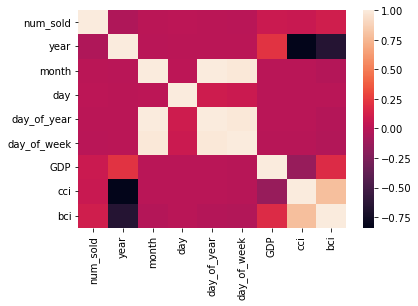

In [21]:
sns.heatmap(dfcor, 
        xticklabels=dfcor.columns,
        yticklabels=dfcor.columns)

In [22]:
df2=df1[df1["country"]== "France"]
dfcor=df2.corr()
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.026889,-0.000620,0.009788,0.000400,-0.005199,0.035796,-0.021021,0.020320
year,0.026889,1.000000,-0.001204,0.001384,0.001592,0.008010,-0.040370,-0.663129,-0.822274
month,-0.000620,-0.001204,1.000000,0.010522,0.996501,0.981455,0.000776,-0.061936,-0.037925
day,0.009788,0.001384,0.010522,1.000000,0.093772,0.077908,-0.000892,-0.000589,-0.002270
day_of_year,0.000400,0.001592,0.996501,0.093772,1.000000,0.983749,-0.001026,-0.064110,-0.040105
day_of_week,-0.005199,0.008010,0.981455,0.077908,0.983749,1.000000,-0.009566,-0.068535,-0.047533
GDP,0.035796,-0.040370,0.000776,-0.000892,-0.001026,-0.009566,1.000000,-0.032169,0.339966
cci,-0.021021,-0.663129,-0.061936,-0.000589,-0.064110,-0.068535,-0.032169,1.000000,0.718593
bci,0.020320,-0.822274,-0.037925,-0.002270,-0.040105,-0.047533,0.339966,0.718593,1.000000


In [23]:
df2=df1[df1["country"]== "Germany"]
dfcor=df2.corr()
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,-0.051127,-0.004263,0.008214,-0.003696,-0.011561,0.064038,0.095720,0.083833
year,-0.051127,1.000000,-0.001204,0.001384,0.001592,0.008010,0.316905,-0.828436,-0.823135
month,-0.004263,-0.001204,1.000000,0.010522,0.996501,0.981455,0.000171,-0.113360,0.016363
day,0.008214,0.001384,0.010522,1.000000,0.093772,0.077908,-0.000196,-0.002946,-0.001851
day_of_year,-0.003696,0.001592,0.996501,0.093772,1.000000,0.983749,-0.000226,-0.115884,0.014517
day_of_week,-0.011561,0.008010,0.981455,0.077908,0.983749,1.000000,-0.004960,-0.124512,0.010431
GDP,0.064038,0.316905,0.000171,-0.000196,-0.000226,-0.004960,1.000000,0.048993,-0.018585
cci,0.095720,-0.828436,-0.113360,-0.002946,-0.115884,-0.124512,0.048993,1.000000,0.830678
bci,0.083833,-0.823135,0.016363,-0.001851,0.014517,0.010431,-0.018585,0.830678,1.000000


In [25]:
df2=df1[df1["country"]== "Italy"]
dfcor=df2.corr()
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.136847,-0.000087,0.006809,0.001243,-0.003605,-0.092374,-0.040755,-0.102167
year,0.136847,1.000000,-0.001204,0.001384,0.001592,0.008010,-0.449185,-0.368425,-0.844217
month,-0.000087,-0.001204,1.000000,0.010522,0.996501,0.981455,0.001189,0.140919,-0.018667
day,0.006809,0.001384,0.010522,1.000000,0.093772,0.077908,-0.001367,-0.000759,-0.002498
day_of_year,0.001243,0.001592,0.996501,0.093772,1.000000,0.983749,-0.001572,0.139149,-0.021100
day_of_week,-0.003605,0.008010,0.981455,0.077908,0.983749,1.000000,-0.011843,0.130099,-0.028768
GDP,-0.092374,-0.449185,0.001189,-0.001367,-0.001572,-0.011843,1.000000,0.820821,0.625916
cci,-0.040755,-0.368425,0.140919,-0.000759,0.139149,0.130099,0.820821,1.000000,0.647329
bci,-0.102167,-0.844217,-0.018667,-0.002498,-0.021100,-0.028768,0.625916,0.647329,1.000000


In [26]:
df2=df1[df1["country"]== "Poland"]
dfcor=df2.corr()
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.506617,0.003374,0.007358,0.006300,0.009320,0.266407,-0.526210,-0.487896
year,0.506617,1.000000,-0.001204,0.001384,0.001592,0.008010,0.823112,-0.571077,-0.675714
month,0.003374,-0.001204,1.000000,0.010522,0.996501,0.981455,-0.000569,-0.112410,0.001142
day,0.007358,0.001384,0.010522,1.000000,0.093772,0.077908,0.000655,-0.002146,-0.002273
day_of_year,0.006300,0.001592,0.996501,0.093772,1.000000,0.983749,0.000753,-0.115154,-0.001265
day_of_week,0.009320,0.008010,0.981455,0.077908,0.983749,1.000000,0.001269,-0.124449,-0.010830
GDP,0.266407,0.823112,-0.000569,0.000655,0.000753,0.001269,1.000000,-0.148343,-0.260614
cci,-0.526210,-0.571077,-0.112410,-0.002146,-0.115154,-0.124449,-0.148343,1.000000,0.898883
bci,-0.487896,-0.675714,0.001142,-0.002273,-0.001265,-0.010830,-0.260614,0.898883,1.000000


In [27]:
df2=df1[df1["country"]== "Spain"]
dfcor=df2.corr()
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.217694,0.009223,0.004869,0.010721,0.008548,-0.152100,-0.230739,-0.155303
year,0.217694,1.000000,-0.001204,0.001384,0.001592,0.008010,-0.217800,-0.799329,-0.752006
month,0.009223,-0.001204,1.000000,0.010522,0.996501,0.981455,0.001088,-0.159769,0.021212
day,0.004869,0.001384,0.010522,1.000000,0.093772,0.077908,-0.001251,-0.002554,-0.002591
day_of_year,0.010721,0.001592,0.996501,0.093772,1.000000,0.983749,-0.001439,-0.162625,0.019259
day_of_week,0.008548,0.008010,0.981455,0.077908,0.983749,1.000000,-0.011737,-0.169838,0.011728
GDP,-0.152100,-0.217800,0.001088,-0.001251,-0.001439,-0.011737,1.000000,0.571644,0.440029
cci,-0.230739,-0.799329,-0.159769,-0.002554,-0.162625,-0.169838,0.571644,1.000000,0.846829
bci,-0.155303,-0.752006,0.021212,-0.002591,0.019259,0.011728,0.440029,0.846829,1.000000


In [36]:
df1.groupby(["year","country"])["GDP","cci","bci"].mean().reset_index()

C:\Users\Bill Giannoulas\AppData\Local\Temp\ipykernel_29980\3866126609.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(["year","country"])["GDP","cci","bci"].mean().reset_index()


,year,country,GDP,cci,bci
0,2017,Belgium,0.50150,101.172479,101.090954
1,2017,France,2.58900,100.709499,101.700571
2,2017,Germany,3.67400,101.809143,102.037951
3,2017,Italy,1.95700,100.185373,101.443533
4,2017,Poland,0.52650,101.785889,101.251948
5,2017,Spain,1.30900,103.134746,102.197216
6,2018,Belgium,0.54340,100.800328,101.409799
7,2018,France,2.78700,99.587761,101.708664
8,2018,Germany,3.96200,101.792513,102.096841
9,2018,Italy,2.09100,101.380763,101.206974


In [30]:
df1

,country,store,product,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,52,0.5015,100.68240,101.1513
1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,52,0.5015,100.68240,101.1513
2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,1,52,0.5015,100.68240,101.1513
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,1,52,0.5015,100.68240,101.1513
4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,1,52,0.5015,100.68240,101.1513
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31,366,53,1.2810,96.47495,100.3876
70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31,366,53,1.2810,96.47495,100.3876
70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31,366,53,1.2810,96.47495,100.3876
70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31,366,53,1.2810,96.47495,100.3876


In [58]:
# Best Store in Sales
df_best_store=df1.groupby(["store"])["num_sold"].sum().reset_index()
df_best_store

,store,num_sold
0,KaggleMart,10117254
1,KaggleRama,3508405


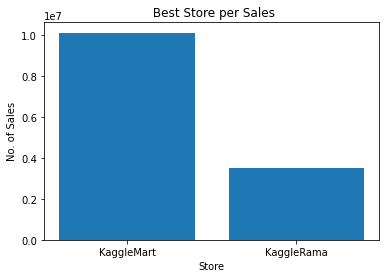

In [61]:
# plt.figure(figsize=(15,3))
plt.title(' Best Store per Sales')
plt.xlabel('Store')
plt.ylabel('No. of Sales')
plt.bar(df_best_store['store'], df_best_store['num_sold'])
plt.show()

In [46]:
df2=df1[df1["country"]== "Poland"]
dfcor=df2.corr()
type(dfcor)
#dfcor.iloc[0,6:0]

pandas.core.frame.DataFrame

In [47]:
df2=df1[df1["country"]== "Poland"]
dfcor=df2.corr()
type(dfcor)

pandas.core.frame.DataFrame

In [52]:
dfcor.loc["num_sold",["GDP","cci","bci"]]

GDP    0.266407
cci   -0.526210
bci   -0.487896
Name: num_sold, dtype: float64

In [50]:
dfcor

,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.506617,0.003374,0.007358,0.006300,0.009320,0.266407,-0.526210,-0.487896
year,0.506617,1.000000,-0.001204,0.001384,0.001592,0.008010,0.823112,-0.571077,-0.675714
month,0.003374,-0.001204,1.000000,0.010522,0.996501,0.981455,-0.000569,-0.112410,0.001142
day,0.007358,0.001384,0.010522,1.000000,0.093772,0.077908,0.000655,-0.002146,-0.002273
day_of_year,0.006300,0.001592,0.996501,0.093772,1.000000,0.983749,0.000753,-0.115154,-0.001265
day_of_week,0.009320,0.008010,0.981455,0.077908,0.983749,1.000000,0.001269,-0.124449,-0.010830
GDP,0.266407,0.823112,-0.000569,0.000655,0.000753,0.001269,1.000000,-0.148343,-0.260614
cci,-0.526210,-0.571077,-0.112410,-0.002146,-0.115154,-0.124449,-0.148343,1.000000,0.898883
bci,-0.487896,-0.675714,0.001142,-0.002273,-0.001265,-0.010830,-0.260614,0.898883,1.000000


In [53]:
dfcor.loc["GDP",["cci","bci"]]

cci   -0.148343
bci   -0.260614
Name: GDP, dtype: float64

In [62]:
df_best_product = df1.groupby(['year', 'product'])['num_sold'].agg('sum').reset_index()

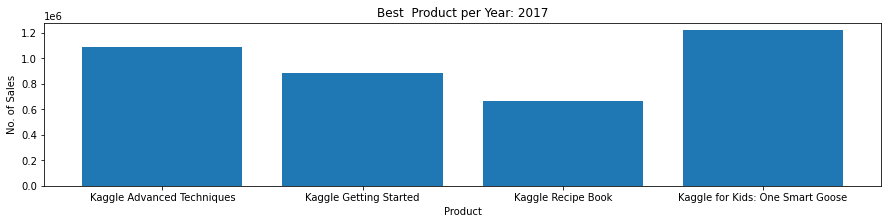

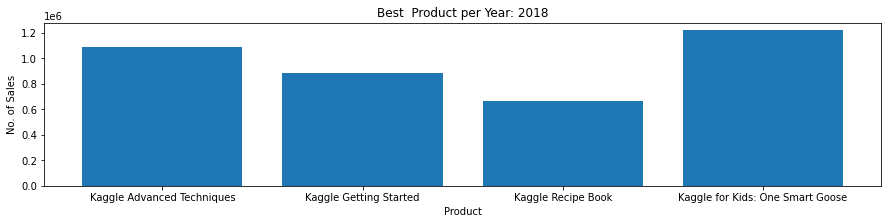

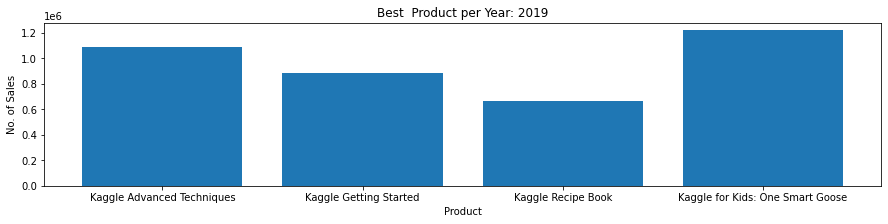

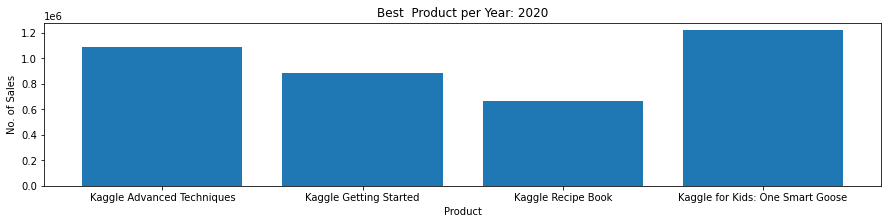

In [64]:
years = [2017,2018,2019,2020]

for year in years:
    x = df_best_product[df_best_product['year'] == year]
    plt.figure(figsize=(15,3))
    plt.title('Best  Product per Year: {}'.format(year))
    plt.xlabel('Product')
    plt.ylabel('No. of Sales')
    plt.bar(df_best_product['product'], df_best_product['num_sold'])
    None

In [54]:
df1

,country,store,product,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,52,0.5015,100.68240,101.1513
1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,52,0.5015,100.68240,101.1513
2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,1,52,0.5015,100.68240,101.1513
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,1,52,0.5015,100.68240,101.1513
4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,1,52,0.5015,100.68240,101.1513
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31,366,53,1.2810,96.47495,100.3876
70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31,366,53,1.2810,96.47495,100.3876
70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31,366,53,1.2810,96.47495,100.3876
70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31,366,53,1.2810,96.47495,100.3876


In [83]:
lst=df1.groupby(["country","product"])["num_sold"].sum().reset_index()
dict1={}
for i in lst["country"].unique():
    dict1[i]=lst[lst["country"]==i].sort_values("num_sold",ascending=False).head(1).iloc[0,1]
dict1    

{'Belgium': 'Kaggle for Kids: One Smart Goose',
 'France': 'Kaggle for Kids: One Smart Goose',
 'Germany': 'Kaggle for Kids: One Smart Goose',
 'Italy': 'Kaggle for Kids: One Smart Goose',
 'Poland': 'Kaggle for Kids: One Smart Goose',
 'Spain': 'Kaggle for Kids: One Smart Goose'}

In [76]:
lst=df1.groupby(["country","product"])["num_sold"].sum().reset_index()

In [79]:
for i in lst["country"].unique():
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [81]:
lst[lst["country"]=="Belgium"].sort_values("num_sold",ascending=False).head(1).iloc[0,1]

'Kaggle for Kids: One Smart Goose'

In [84]:
new=pd.DataFrame(dict1)

ValueError: If using all scalar values, you must pass an index

In [85]:
lst=df1.groupby(["country","product"])["num_sold"].sum().reset_index()

In [86]:
lst

,country,product,num_sold
0,Belgium,Kaggle Advanced Techniques,798840
1,Belgium,Kaggle Getting Started,640927
2,Belgium,Kaggle Recipe Book,480174
3,Belgium,Kaggle for Kids: One Smart Goose,861109
4,France,Kaggle Advanced Techniques,722271
5,France,Kaggle Getting Started,578496
6,France,Kaggle Recipe Book,432964
7,France,Kaggle for Kids: One Smart Goose,778588
8,Germany,Kaggle Advanced Techniques,800443
9,Germany,Kaggle Getting Started,641336


In [87]:
dict1 

{'Belgium': 'Kaggle for Kids: One Smart Goose',
 'France': 'Kaggle for Kids: One Smart Goose',
 'Germany': 'Kaggle for Kids: One Smart Goose',
 'Italy': 'Kaggle for Kids: One Smart Goose',
 'Poland': 'Kaggle for Kids: One Smart Goose',
 'Spain': 'Kaggle for Kids: One Smart Goose'}

In [97]:
df_new=pd.DataFrame(data=dict1,index=list(dict1.keys()))

ValueError: If using all scalar values, you must pass an index

In [95]:
df_new

,Belgium,France,Germany,Italy,Poland,Spain
Belgium,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose
France,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose
Germany,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose
Italy,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose
Poland,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose
Spain,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose,Kaggle for Kids: One Smart Goose


In [99]:
df_new = pd.DataFrame.from_dict(dict1, orient='index', columns=['Most Popular Product'])

In [100]:
df_new

,Most Popular Product
Belgium,Kaggle for Kids: One Smart Goose
France,Kaggle for Kids: One Smart Goose
Germany,Kaggle for Kids: One Smart Goose
Italy,Kaggle for Kids: One Smart Goose
Poland,Kaggle for Kids: One Smart Goose
Spain,Kaggle for Kids: One Smart Goose


In [101]:
df_new.plot()

TypeError: no numeric data to plot

In [102]:
df5=df1.copy()

In [103]:
per_country_best_store=df5.groupby(["country","store"])["num_sold"].sum()

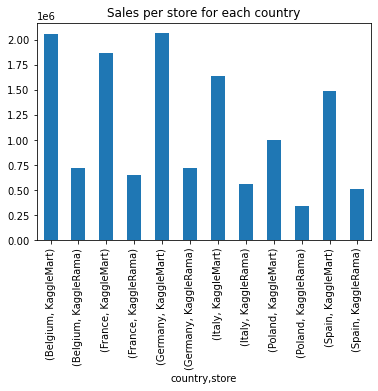

In [108]:
per_country_best_store.plot(kind="bar",title="Sales per store for each country")
None

In [109]:
df1

,country,store,product,num_sold,year,month,day,day_of_year,day_of_week,GDP,cci,bci
0,Belgium,KaggleMart,Kaggle Advanced Techniques,663,2017,1,1,1,52,0.5015,100.68240,101.1513
1,Belgium,KaggleMart,Kaggle Getting Started,615,2017,1,1,1,52,0.5015,100.68240,101.1513
2,Belgium,KaggleMart,Kaggle Recipe Book,480,2017,1,1,1,52,0.5015,100.68240,101.1513
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710,2017,1,1,1,52,0.5015,100.68240,101.1513
4,Belgium,KaggleRama,Kaggle Advanced Techniques,240,2017,1,1,1,52,0.5015,100.68240,101.1513
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614,2020,12,31,366,53,1.2810,96.47495,100.3876
70124,Spain,KaggleRama,Kaggle Advanced Techniques,215,2020,12,31,366,53,1.2810,96.47495,100.3876
70125,Spain,KaggleRama,Kaggle Getting Started,158,2020,12,31,366,53,1.2810,96.47495,100.3876
70126,Spain,KaggleRama,Kaggle Recipe Book,135,2020,12,31,366,53,1.2810,96.47495,100.3876


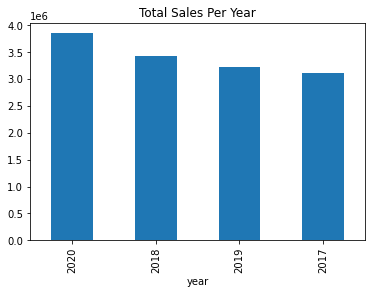

In [111]:
df1.groupby("year")["num_sold"].sum().sort_values(ascending=False).plot(kind="bar",title='Total Sales Per Year')
None

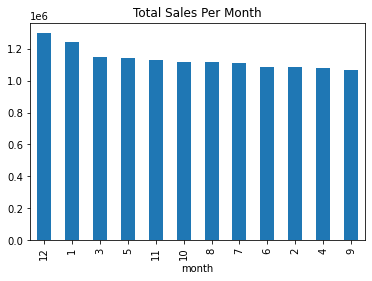

In [113]:
df1.groupby("month")["num_sold"].sum().sort_values(ascending=False).plot(kind="bar",title='Total Sales Per Month')
None

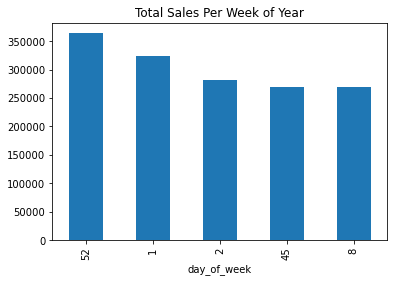

In [116]:
df1.groupby("day_of_week")["num_sold"].sum().sort_values(ascending=False).head(5).plot(kind="bar",title='Total Sales Per Week of Year')
None

In [118]:
df2=df1[df1["country"]== "Spain"]
dfcor=df2.corr().loc["num_sold",["GDP","cci","bci"]]
dfcor

GDP   -0.152100
cci   -0.230739
bci   -0.155303
Name: num_sold, dtype: float64

In [119]:
df2=df1[df1["country"]== "Spain"]
dfcor=df2.corr()

In [121]:
dfcor.drop(columns=["year","month","day",])

,num_sold,day,day_of_year,day_of_week,GDP,cci,bci
num_sold,1.000000,0.004869,0.010721,0.008548,-0.152100,-0.230739,-0.155303
year,0.217694,0.001384,0.001592,0.008010,-0.217800,-0.799329,-0.752006
month,0.009223,0.010522,0.996501,0.981455,0.001088,-0.159769,0.021212
day,0.004869,1.000000,0.093772,0.077908,-0.001251,-0.002554,-0.002591
day_of_year,0.010721,0.093772,1.000000,0.983749,-0.001439,-0.162625,0.019259
day_of_week,0.008548,0.077908,0.983749,1.000000,-0.011737,-0.169838,0.011728
GDP,-0.152100,-0.001251,-0.001439,-0.011737,1.000000,0.571644,0.440029
cci,-0.230739,-0.002554,-0.162625,-0.169838,0.571644,1.000000,0.846829
bci,-0.155303,-0.002591,0.019259,0.011728,0.440029,0.846829,1.000000


In [122]:
df_c=df1[["country","num_sold","GDP","cci","bci"]]
df_c

,country,num_sold,GDP,cci,bci
0,Belgium,663,0.5015,100.68240,101.1513
1,Belgium,615,0.5015,100.68240,101.1513
2,Belgium,480,0.5015,100.68240,101.1513
3,Belgium,710,0.5015,100.68240,101.1513
4,Belgium,240,0.5015,100.68240,101.1513
...,...,...,...,...,...
70123,Spain,614,1.2810,96.47495,100.3876
70124,Spain,215,1.2810,96.47495,100.3876
70125,Spain,158,1.2810,96.47495,100.3876
70126,Spain,135,1.2810,96.47495,100.3876


In [126]:
for i in df_c["country"].unique():
    print("-------------------------------")
    print("Country is {}".format(i))
    print(df_c[df_c["country"]==i].corr())

-------------------------------
Country is Belgium
          num_sold       GDP       cci       bci
num_sold  1.000000  0.076059  0.066037  0.103079
GDP       0.076059  1.000000 -0.147814  0.178783
cci       0.066037 -0.147814  1.000000  0.791252
bci       0.103079  0.178783  0.791252  1.000000
-------------------------------
Country is France
          num_sold       GDP       cci       bci
num_sold  1.000000  0.035796 -0.021021  0.020320
GDP       0.035796  1.000000 -0.032169  0.339966
cci      -0.021021 -0.032169  1.000000  0.718593
bci       0.020320  0.339966  0.718593  1.000000
-------------------------------
Country is Germany
          num_sold       GDP       cci       bci
num_sold  1.000000  0.064038  0.095720  0.083833
GDP       0.064038  1.000000  0.048993 -0.018585
cci       0.095720  0.048993  1.000000  0.830678
bci       0.083833 -0.018585  0.830678  1.000000
-------------------------------
Country is Italy
          num_sold       GDP       cci       bci
num_sold  1.000

In [132]:
ff=df1.groupby(["country","year"])["GDP","cci","bci"].mean().reset_index()

C:\Users\Bill Giannoulas\AppData\Local\Temp\ipykernel_29980\3242594393.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ff=df1.groupby(["country","year"])["GDP","cci","bci"].mean().reset_index()


In [133]:
ff

,country,year,GDP,cci,bci
0,Belgium,2017,0.50150,101.172479,101.090954
1,Belgium,2018,0.54340,100.800328,101.409799
2,Belgium,2019,0.53330,99.893823,100.204633
3,Belgium,2020,0.51530,99.576951,98.866383
4,France,2017,2.58900,100.709499,101.700571
5,France,2018,2.78700,99.587761,101.708664
6,France,2019,2.71600,100.001328,100.409337
7,France,2020,2.60300,98.639666,98.815818
8,Germany,2017,3.67400,101.809143,102.037951
9,Germany,2018,3.96200,101.792513,102.096841


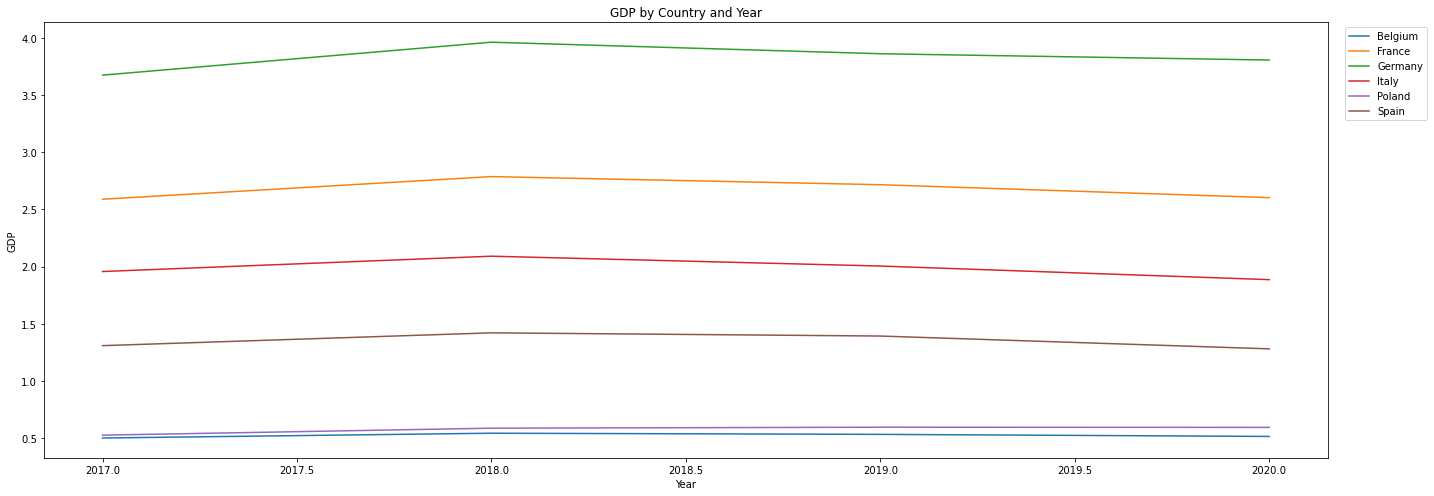

In [153]:
plt.figure(figsize=(20,7))
sns.lineplot(data=ff, x='year', y='GDP', hue='country')
#sns.lineplot(data=ff, x='year', y='cci', hue='country')
#sns.lineplot(data=ff, x='year', y='bci', hue='country')

# Set plot title and labels
#plt.figure(figsize=(15,3))
plt.title('GDP by Country and Year')
plt.xlabel('Year')
plt.ylabel('GDP')

# Show the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()








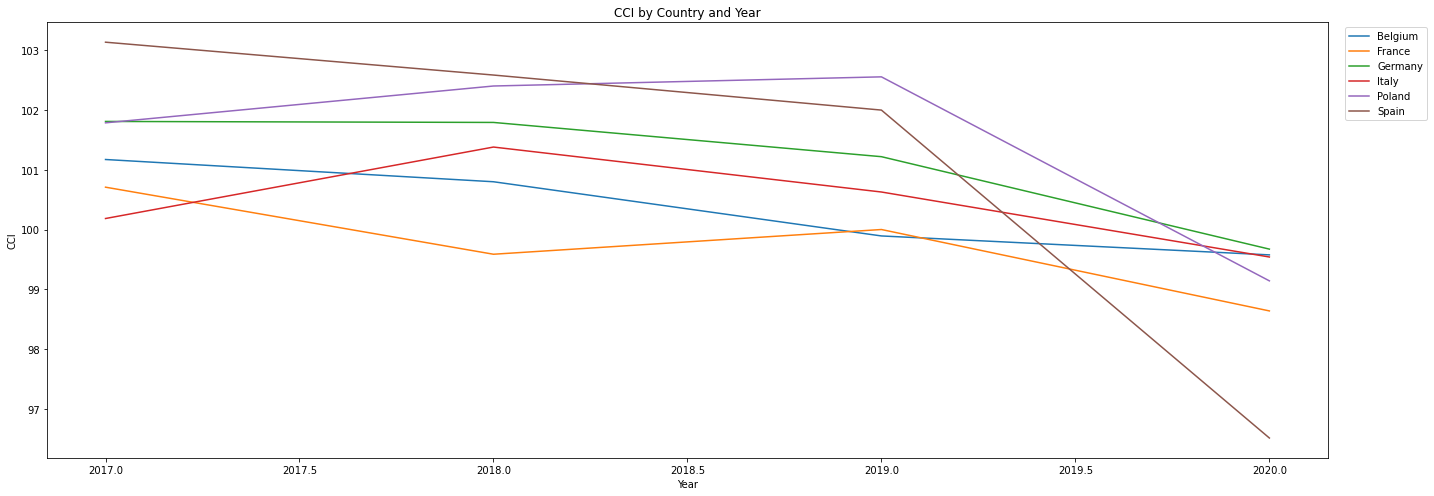

In [145]:
plt.figure(figsize=(20,7))
#sns.lineplot(data=ff, x='year', y='GDP', hue='country')
sns.lineplot(data=ff, x='year', y='cci', hue='country')
#sns.lineplot(data=ff, x='year', y='bci', hue='country')

# Set plot title and labels
#plt.figure(figsize=(15,3))
plt.title('CCI by Country and Year')
plt.xlabel('Year')
plt.ylabel('CCI')

# Show the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

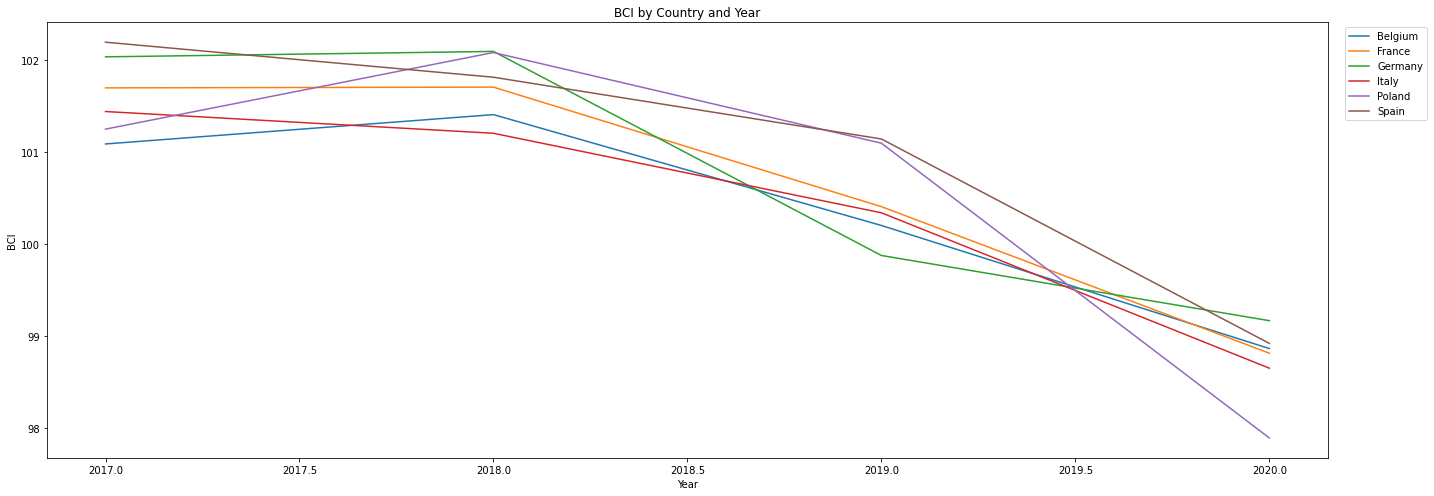

In [146]:
plt.figure(figsize=(20,7))
#sns.lineplot(data=ff, x='year', y='GDP', hue='country')
#sns.lineplot(data=ff, x='year', y='cci', hue='country')
sns.lineplot(data=ff, x='year', y='bci', hue='country')

# Set plot title and labels
#plt.figure(figsize=(15,3))
plt.title('BCI by Country and Year')
plt.xlabel('Year')
plt.ylabel('BCI')

# Show the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [150]:
dd=df1.groupby(["country","year"])["num_sold"].mean().reset_index()
dd

,country,year,num_sold
0,Belgium,2017,233.321575
1,Belgium,2018,256.648630
2,Belgium,2019,242.581849
3,Belgium,2020,219.261612
4,France,2017,204.921233
5,France,2018,224.668836
6,France,2019,210.708904
7,France,2020,219.482923
8,Germany,2017,234.840411
9,Germany,2018,257.512329


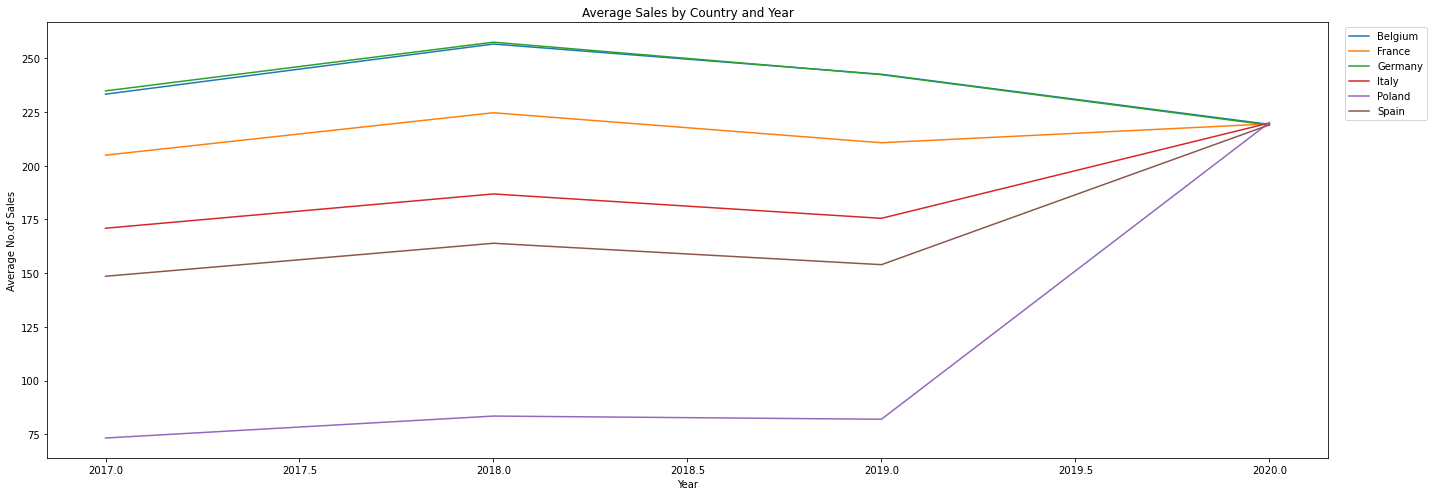

In [149]:
plt.figure(figsize=(20,7))
#sns.lineplot(data=ff, x='year', y='GDP', hue='country')
#sns.lineplot(data=ff, x='year', y='cci', hue='country')
sns.lineplot(data=dd, x='year', y='num_sold', hue='country')

# Set plot title and labels
#plt.figure(figsize=(15,3))
plt.title('Average Sales by Country and Year')
plt.xlabel('Year')
plt.ylabel('Average No.of Sales')

# Show the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [151]:
d=df1.groupby(["country","year"])["num_sold"].sum().reset_index()

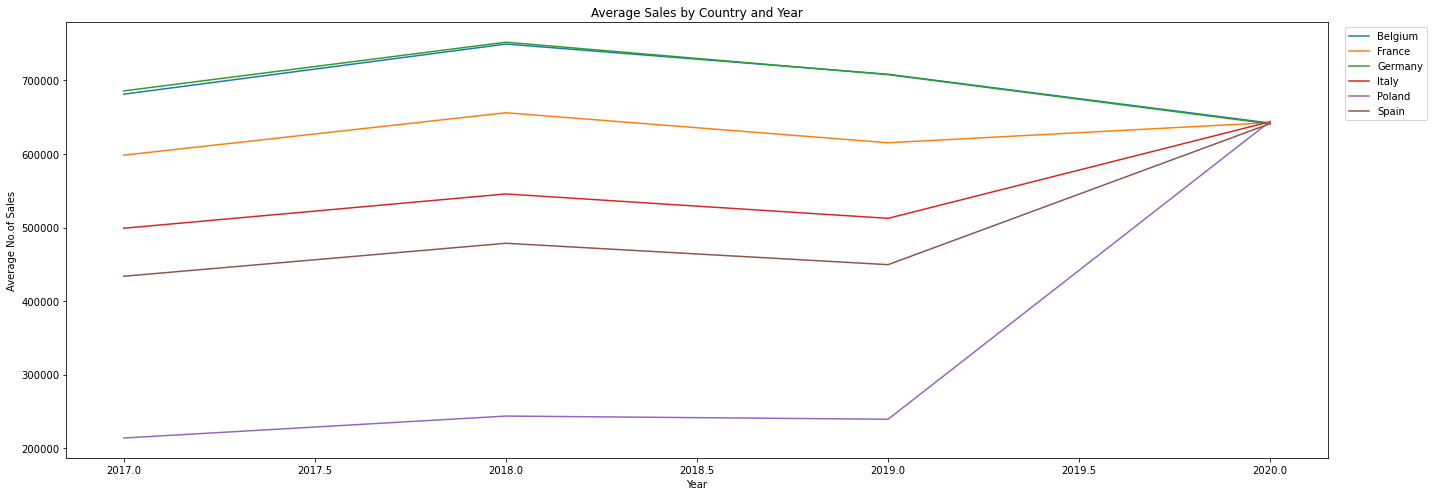

In [152]:
plt.figure(figsize=(20,7))
#sns.lineplot(data=ff, x='year', y='GDP', hue='country')
#sns.lineplot(data=ff, x='year', y='cci', hue='country')
sns.lineplot(data=d, x='year', y='num_sold', hue='country')

# Set plot title and labels
#plt.figure(figsize=(15,3))
plt.title('Average Sales by Country and Year')
plt.xlabel('Year')
plt.ylabel('Average No.of Sales')

# Show the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()